In [0]:
dir = '/content/drive/My Drive/DL Project/Data/Train/'

In [2]:
%tensorflow_version 1.x
import keras
import cv2
import numpy as np 
import os

from keras.layers import Dense, LSTM, Flatten
from keras.layers import TimeDistributed, Conv2D, Dropout
from keras import Sequential
from keras.applications.vgg16 import VGG16

TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
# we make use of the keras VGG16 "model" for transfer learning
vgg = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# train only the 4 last layers 
for layer in vgg.layers[:-4]:
    layer.trainable = False

model = Sequential()

# add vgg model for 5 input images
model.add(
    TimeDistributed(vgg, input_shape=(5, 224, 224, 3))
)
model.add(
    TimeDistributed(
        Flatten()
    )
)

model.add(LSTM(256, activation='relu', return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

#target layer with 3 units
model.add(Dense(3, activation='softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
optimizer = keras.optimizers.Adam(0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 5, 7, 7, 512)      14714688  
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 25088)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               25953280  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 40,684,611
Trainable params: 33,049,347
Non-trainable params: 7,635,264
__________________________________

In [6]:
#find the classes present
from glob import glob
classes = glob(dir+'*')
for i in range(0, len(classes)):
  classes[i] = classes[i].replace(dir,"")

for Class in classes:
  print(Class)

reading book
reading newspaper
not reading


In [0]:
# pattern to get videos and classes
glob_pattern=dir + '{classname}/*.mp4'

In [8]:
import os
import glob
import keras
!pip install keras-video-generators
from keras_video import VideoFrameGenerator

SIZE = (224, 224)
CHANNELS = 3
NBFRAME = 5
BS = 8

# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.33, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)


Warning, `split` argument is replaced by `split_val`, please condider to change your source code.The `split` argument will be removed in future releases.


class not reading, validation count: 24, train count: 51
class reading book, validation count: 29, train count: 59
class reading newspaper, validation count: 56, train count: 116
Total data: 3 classes for 226 files for train


In [9]:
valid = train.get_validation_generator()

Total data: 3 classes for 109 files for validation


In [0]:
global history

In [11]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(verbose=1),
    keras.callbacks.ModelCheckpoint(
        'weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
]


history = model.fit_generator(
    train,
    validation_data=valid,
    verbose=1,
    epochs= 30,
    callbacks=callbacks,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
28/28 [==============================] - 191s 7s/step - loss: 1.0985 - acc: 0.4643 - val_loss: 0.9741 - val_acc: 0.5385

Epoch 00001: saving model to weights.01-0.97.hdf5
Epoch 2/30
28/28 [==============================] - 12s 419ms/step - loss: 0.9610 - acc: 0.5357 - val_loss: 0.9484 - val_acc: 0.5481

Epoch 00002: saving model to weights.02-0.95.hdf5
Epoch 3/30
28/28 [==============================] - 14s 483ms/step - loss: 0.9369 - acc: 0.5357 - val_loss: 0.8145 - val_acc: 0.6442

Epoch 00003: saving model to weights.03-0.81.hdf5
Epoch 4/30
28/28 [==============================] - 13s 476ms/step - loss: 0.8974 - acc: 0.5312 - val_loss: 1.1648 - val_acc: 0.6538

Epoch 00004: saving model to weights.04-1.16.hdf5
Epoch 5/30
28/28 [==============================] - 13s 482ms/step - loss: 0.8053 - acc: 0.6250 - val_loss: 0.7722 - val_acc: 0.6731

Epoch 00005: saving model to weights

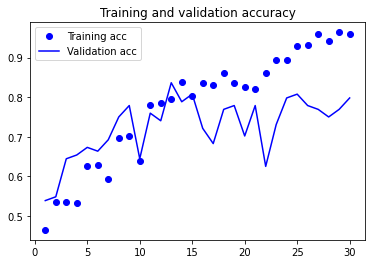

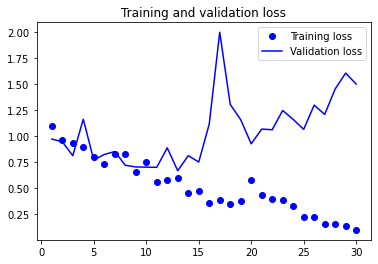

printking Keys in history


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
print('printking Keys in history')

In [0]:
from keras.utils.vis_utils import plot_model

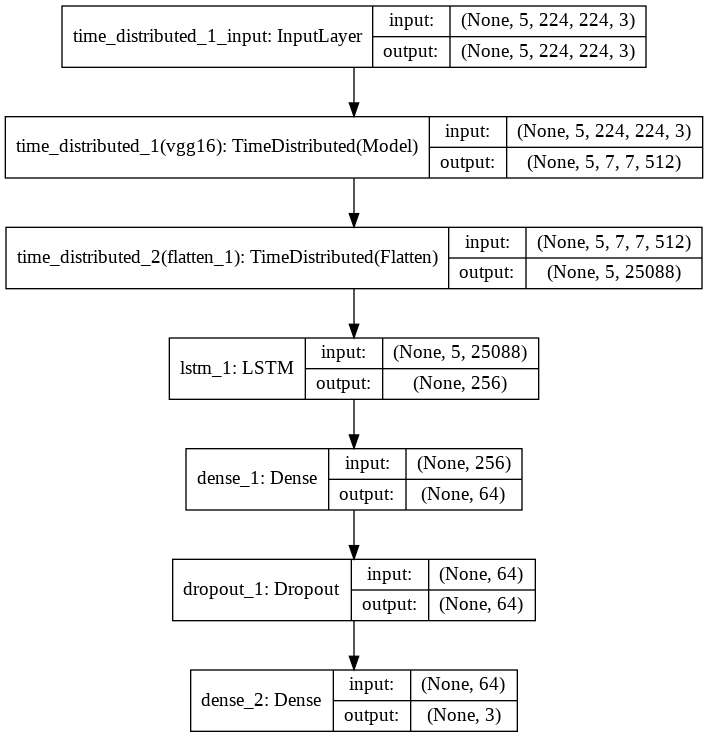

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
from keras.models import load_model

model.save('my_model.h5') 

In [0]:
model.save_weights('my_model_weights.h5')